# Baseline Model prediction
---

### Initialization

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import sys
import os
# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from functions_nico.nico_preprocessing import load_data
from functions_nico.nico_models import baseline_model, print_model, split_data


/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
df = load_data("../data/fueldata/wertheim_23-25.parquet")

### Fuel price prediction

In [3]:
# Get predictions from baseline model

df = df[df["station_uuid"] == "fb0f8030-c1eb-4df1-9410-054eea7422ad"]
train,test = split_data(df)
predictions = baseline_model(train,predictions=len(test),stepsize=(5,"minutes"),rule="daily mean")

In [4]:
# Reduce predictions
predictions = predictions[(predictions["datetime"]>pd.to_datetime("2025-04-30")) & (predictions["datetime"]<pd.to_datetime("2025-05-02"))]
df = df[df["datetime"]>pd.to_datetime("2025-04-28")]

### Visualization and results

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/functions_nico/nico_models.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


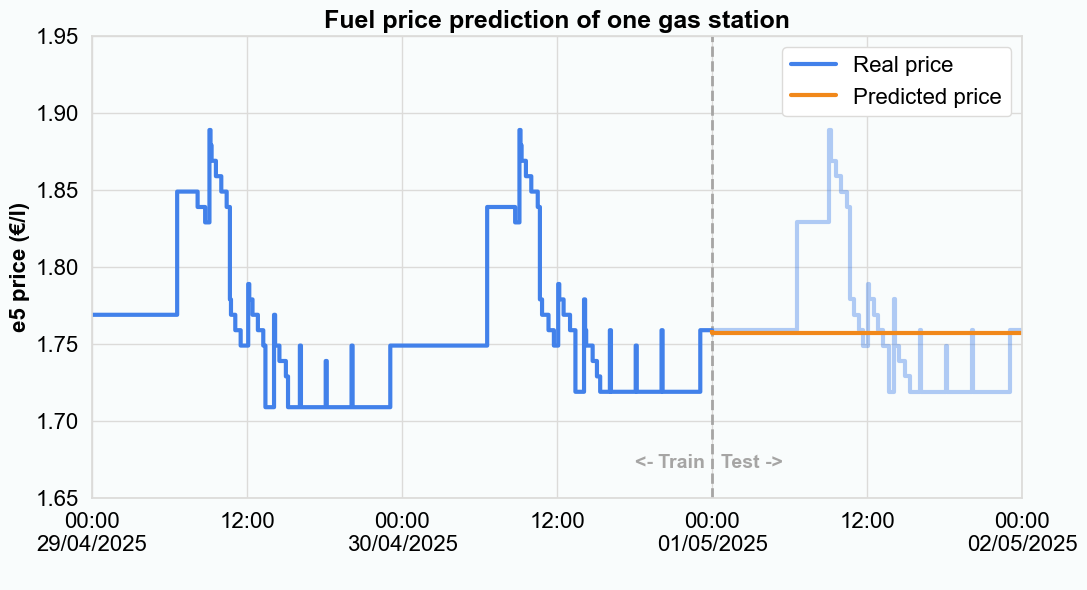

RMSE: 0.042
MAE: 0.03
R2: -0.002


In [5]:
params = {"background":"#f9fcfc",
          "gridcolor": "#dcdbd9",
          "legendedge": "#dcdbd9",
          "legendface": "white",
          "legendcol": "black",
          "textcolor": "black"
          }

print_model(df,predictions,x="datetime",y="e5",xlim=("2025-04-29","2025-05-02"),ylim=(1.65,1.95),
            title = "Fuel price prediction of one gas station",params = params)